# Übung 5

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

## Beobachtungen - Impirische Daten

### Daten einlesen

In [52]:
# Beobachtungen, Exponential, Pareto
data = pd.read_excel("./Ü5-HA-Hazardraten-Daten.xlsx",sheet_name="Beobachtungen")

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alter                 101 non-null    int64  
 1   Überlebende           101 non-null    float64
 2   Überlebende (Anteil)  101 non-null    float64
 3   Gestorbene            101 non-null    float64
 4   Gestorbene (Anteil)   101 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.1 KB


### (a)

In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data["Alter"], y=data["Überlebende (Anteil)"], mode='lines+markers', name='Überlebensrate'))

fig.update_layout(
    title="Caplan Mayer Kurve",
    xaxis_title="Alter",
    yaxis_title="Überlebensrate",
)

fig.show()

In [55]:
# (i)
print("P(x > 40) = ", (1 -  sum(data["Gestorbene (Anteil)"][0:40])) * 100, "%") 
print((data["Überlebende (Anteil)"][40]) * 100)
# (ii)
print("P(X = 40) = ", 100 * data["Gestorbene (Anteil)"][40], "%")

P(x > 40) =  98.14051563822511 %
98.14051563822514
P(X = 40) =  0.12836006321060958 %


### (b)

In [56]:
data['Wahrscheinlichkeit'] = data['Gestorbene'] / data['Überlebende']

fig = px.bar(data, x='Alter', y='Wahrscheinlichkeit', 
             labels={'Wahrscheinlichkeit': 'Wahrscheinlichkeit zu sterben'})

fig.update_layout(title='Interaktives Häufigkeitsdiagramm der Sterbewahrscheinlichkeiten', 
                  xaxis_title='Alter', yaxis_title='Wahrscheinlichkeit',width=700, height=800)
fig.show()

### (c)

In [57]:
data['Gewichteter_Anteil'] = data['Gestorbene'] / data['Gestorbene'].sum()
data['Gewichtetes_Alter'] = data['Alter'] * data['Gewichteter_Anteil']
erwartetes_lebensalter = data['Gewichtetes_Alter'].sum()

print(f'Das erwartete Lebensalter beträgt: {erwartetes_lebensalter:.2f} Jahre')

Das erwartete Lebensalter beträgt: 77.75 Jahre


### (d)

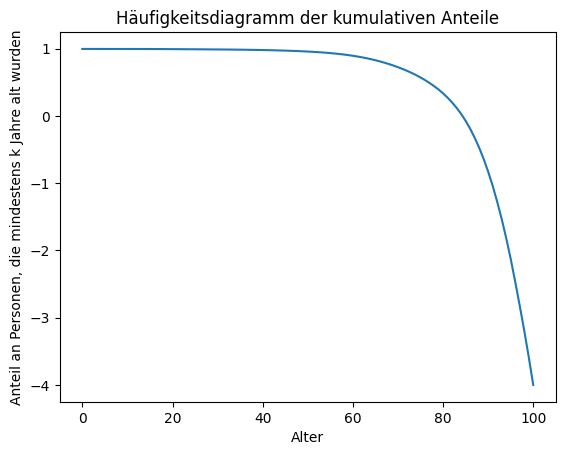

In [58]:
data['Kumulative_Anteile'] = 1 - data['Wahrscheinlichkeit'].cumsum()

plt.plot(data['Alter'], data['Kumulative_Anteile'])
plt.xlabel('Alter')
plt.ylabel('Anteil an Personen, die mindestens k Jahre alt wurden')
plt.title('Häufigkeitsdiagramm der kumulativen Anteile')
plt.show()

### (e)

In [63]:
data['Kumulative_Anteile'] = 1 - data['Wahrscheinlichkeit'].cumsum()

# Berechne die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, auch mindestens 41 wird
s_40 = data.loc[40, 'Kumulative_Anteile'] - data.loc[41, 'Kumulative_Anteile']

print(f'Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, auch mindestens 41 Jahre alt wird, beträgt: {s_40 * 100}')


Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, auch mindestens 41 Jahre alt wird, beträgt: 0.14041085631502082


### (f)

In [64]:
h_40 = data.loc[40, 'Wahrscheinlichkeit']

print(f'Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, im genau 41. Lebensjahr stirbt, beträgt: {h_40 * 100}')

Die Wahrscheinlichkeit, dass eine Person, die 40 Jahre alt ist, im genau 41. Lebensjahr stirbt, beträgt: 0.13079212227066608


### (g)

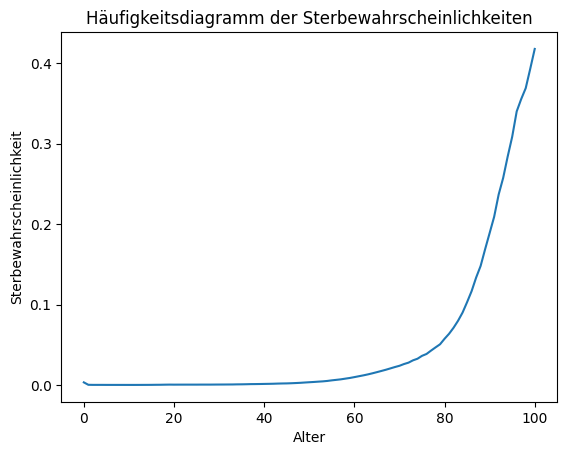

In [65]:
h_k = data['Wahrscheinlichkeit']

plt.plot(data['Alter'], h_k)
plt.xlabel('Alter')
plt.ylabel('Sterbewahrscheinlichkeit')
plt.title('Häufigkeitsdiagramm der Sterbewahrscheinlichkeiten')
plt.show()